# Scraping aci.aero

In [21]:
#=========================
#        SETTINGS
#=========================

startYear = 2007
endYear = 2017

#=========================
import requests
import urllib.request
import re
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import pandas as pd

#Initialize
pageNum = startYear
yearList = []
rankList = []
airportCodeList = []
cityNameList = []
passengerTotalList = []
changePercentList = []
count = 0 #For tracing progress

#Loop
while pageNum <= endYear:
    
    if pageNum == 2017:
        url = 'https://aci.aero/data-centre/annual-traffic-data/passengers/' + str(pageNum) + '-passenger-summary-annual-traffic-data/'
    else:
        url = 'https://aci.aero/data-centre/annual-traffic-data/passengers/' + str(pageNum) + '-final-summary/'
    

    #Loading the page
    hdr = {'User-Agent': 'Mozilla/5.0'}
    req = Request(url,headers=hdr)
    page = urlopen(req)
    results = BeautifulSoup(page).find(class_="row-hover").find_all("tr")
    
    for result in results:
        tds = result.find_all("td")
        
        #Rank
        rank = tds[0].text.strip()
        
        #City Name and Airport Code
        position = tds[1].text.find("(")
        cityAndAirport = tds[1].text.strip()
        airportCode = cityAndAirport[position+1 : -1]
        cityName = cityAndAirport[0:position].strip()
        
        #Passenger
        passengerTotal = tds[2].text.replace(" ", "").replace(",", "").strip()

        #Change Percent
        changePercent = tds[-1].text.replace("%", "").strip()
        
        #Write into the lists
        yearList.append(pageNum)
        rankList.append(rank)
        airportCodeList.append(airportCode)
        cityNameList.append(cityName)
        passengerTotalList.append(passengerTotal)
        changePercentList.append(changePercent)
            
    #Next Year
    pageNum += 1
    
    #Tracing progress
    print("{:.0%}".format(count/(endYear-startYear)) + " finished.")
    count +=1
    
#Output CSV
total = dict(zip(['Year',
                  'Rank', 
                  'City Name', 
                  'Airport Code', 
                  'Total Passengers', 
                  '% Change'], 
                 [yearList, 
                  rankList, 
                  cityNameList, 
                  airportCodeList, 
                  passengerTotalList,
                  changePercentList]))
df = pd.DataFrame(total)
df.to_csv("TenYearPassengerSummary.csv", index=False)
print("Done!")

0% finished.
10% finished.
20% finished.
30% finished.
40% finished.
50% finished.
60% finished.
70% finished.
80% finished.
90% finished.
100% finished.
Done!


In [143]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

airports = pd.read_csv("TenYearPassengerSummary.csv")
airports = airports.pivot(index='Year', columns='Airport Code', values='Rank')
airportsCodes = airports.columns.tolist()
years = airports.index.values.tolist()
airports.head()

Airport Code,AMS,ATL,BKK,CAN,CDG,CGK,CLT,DEL,DEN,DFW,...,MSP,MUC,NRT,ORD,PEK,PHX,PVG,SFO,SIN,SYD
Year,,,,,,,,,,,,,,,,,,,,,
2007,12.0,1.0,18.0,NaN,6.0,NaN,30.0,NaN,11.0,7.0,...,26.0,28.0,24.0,2.0,9.0,17.0,NaN,23.0,19.0,NaN
2008,14.0,1.0,18.0,NaN,5.0,NaN,26.0,NaN,10.0,7.0,...,30.0,27.0,NaN,2.0,8.0,17.0,NaN,21.0,19.0,NaN
2009,14.0,1.0,16.0,23.0,6.0,22.0,24.0,NaN,10.0,8.0,...,NaN,30.0,NaN,4.0,3.0,19.0,NaN,20.0,21.0,28.0
2010,15.0,1.0,17.0,19.0,7.0,16.0,25.0,NaN,10.0,8.0,...,NaN,30.0,NaN,3.0,2.0,24.0,20.0,23.0,18.0,27.0
2011,14.0,1.0,16.0,19.0,7.0,12.0,25.0,NaN,11.0,8.0,...,NaN,27.0,NaN,4.0,2.0,22.0,20.0,21.0,18.0,NaN


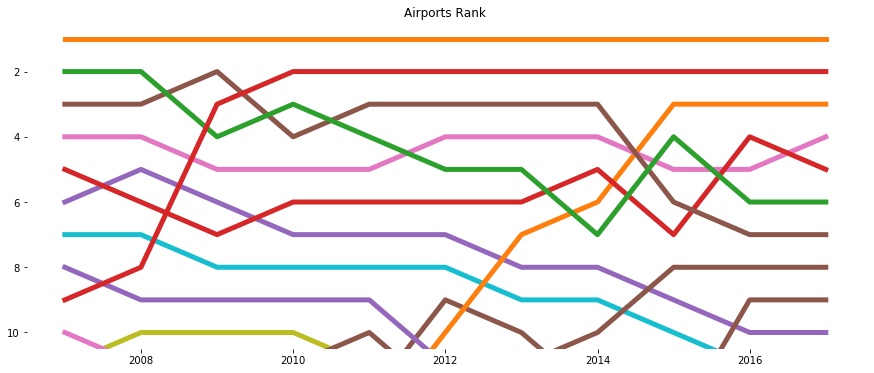

In [142]:
fig, ax = plt.subplots(figsize=(15, 6))

plt.title('Airports Rank')

for airportsCode in airportsCodes:
    ax.plot(years,airports[airportsCode], label = airportsCode, linewidth = 5)
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.ylim([0.5,10.5])
plt.gca().invert_yaxis()